In [2]:
from tensorflow.keras.layers import Input, Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import glob

In [3]:
image_size=[224,224]

In [4]:

train_path=r'D:\Sandesh\Data Science\Deep Learning\Sentiment_Analysis\eINTERFACE_2021_Image\train'
test_path=r'D:\Sandesh\Data Science\Deep Learning\Sentiment_Analysis\eINTERFACE_2021_Image\test'


### Inception

In [5]:
inception=InceptionV3(input_shape=image_size + [3],weights='imagenet',include_top=False)


In [6]:
for layer in inception.layers:
    layer.trainable=False
    

In [7]:
from glob import glob
folders=glob(r'D:\Sandesh\Data Science\Deep Learning\Sentiment_Analysis\eINTERFACE_2021_Image\train/*')
folders

['D:\\Sandesh\\Data Science\\Deep Learning\\Sentiment_Analysis\\eINTERFACE_2021_Image\\train\\Anger',
 'D:\\Sandesh\\Data Science\\Deep Learning\\Sentiment_Analysis\\eINTERFACE_2021_Image\\train\\Disgust',
 'D:\\Sandesh\\Data Science\\Deep Learning\\Sentiment_Analysis\\eINTERFACE_2021_Image\\train\\Fear',
 'D:\\Sandesh\\Data Science\\Deep Learning\\Sentiment_Analysis\\eINTERFACE_2021_Image\\train\\Happiness',
 'D:\\Sandesh\\Data Science\\Deep Learning\\Sentiment_Analysis\\eINTERFACE_2021_Image\\train\\Sadness',
 'D:\\Sandesh\\Data Science\\Deep Learning\\Sentiment_Analysis\\eINTERFACE_2021_Image\\train\\Surprise']

In [55]:
# Flatten the Output layer

x=Flatten()(inception.output)
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=inception.input,outputs=prediction)

In [56]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 111, 111, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 111, 111, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                           

 batch_normalization_193 (Batch  (None, 25, 25, 64)  192         ['conv2d_193[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_195 (Batch  (None, 25, 25, 64)  192         ['conv2d_195[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_198 (Batch  (None, 25, 25, 96)  288         ['conv2d_198[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_199 (Batch  (None, 25, 25, 32)  96          ['conv2d_199[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_210 (Batch  (None, 25, 25, 64)  192         ['conv2d_210[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_210 (Activation)    (None, 25, 25, 64)   0           ['batch_normalization_210[0][0]']
                                                                                                  
 conv2d_208 (Conv2D)            (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_211 (Conv2D)            (None, 25, 25, 96)   55296       ['activation_210[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_10 (MaxPooling2D  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_214[0][0]',         
                                                                  'activation_217[0][0]',         
                                                                  'max_pooling2d_10[0][0]']       
                                                                                                  
 conv2d_222 (Conv2D)            (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_nor

                                                                  'activation_226[0][0]',         
                                                                  'activation_227[0][0]']         
                                                                                                  
 conv2d_232 (Conv2D)            (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_232 (Batch  (None, 12, 12, 160)  480        ['conv2d_232[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_232 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_232[0][0]']
                                                                                                  
 conv2d_23

 batch_normalization_242 (Batch  (None, 12, 12, 160)  480        ['conv2d_242[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_242 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_242[0][0]']
                                                                                                  
 conv2d_243 (Conv2D)            (None, 12, 12, 160)  179200      ['activation_242[0][0]']         
                                                                                                  
 batch_normalization_243 (Batch  (None, 12, 12, 160)  480        ['conv2d_243[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv2d_253 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_252[0][0]']         
                                                                                                  
 batch_normalization_253 (Batch  (None, 12, 12, 192)  576        ['conv2d_253[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_253 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_253[0][0]']
                                                                                                  
 conv2d_249 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_254 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_253[0][0]']         
          

 activation_261 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_261[0][0]']
                                                                                                  
 conv2d_258 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_262 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_261[0][0]']         
                                                                                                  
 batch_normalization_258 (Batch  (None, 12, 12, 192)  576        ['conv2d_258[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_262 (Batch  (None, 12, 12, 192)  576        ['conv2d_262[0][0]']             
 Normaliza

 conv2d_272 (Conv2D)            (None, 5, 5, 192)    245760      ['average_pooling2d_25[0][0]']   
                                                                                                  
 batch_normalization_264 (Batch  (None, 5, 5, 320)   960         ['conv2d_264[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_266 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_266[0][0]']
                                                                                                  
 activation_267 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_267[0][0]']
                                                                                                  
 activation_270 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_270[0][0]']
          

                                                                                                  
 activation_276 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_276[0][0]']
                                                                                                  
 activation_279 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_279[0][0]']
                                                                                                  
 activation_280 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_280[0][0]']
                                                                                                  
 batch_normalization_281 (Batch  (None, 5, 5, 192)   576         ['conv2d_281[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

In [63]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
    
)

In [59]:
# Data augmentation is done only on training data not on testing data.
# Data augmentation is done so that the images can be viewed from all sides and the model can be trained with such images.

train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)
train_datagen

In [60]:
# FLow from directory 
# Description:Takes the path to a directory, and generates batches of augmented/normalized data.


training_set=train_datagen.flow_from_directory(r'D:\Sandesh\Data Science\Deep Learning\Sentiment_Analysis\eINTERFACE_2021_Image\train',
                                                target_size=(224,224),
                                               batch_size=16,
                                               class_mode='categorical'
                                              )

test_set=train_datagen.flow_from_directory(r'D:\Sandesh\Data Science\Deep Learning\Sentiment_Analysis\eINTERFACE_2021_Image\test',
                                            target_size=(224,224),
                                               batch_size=16,
                                               class_mode='categorical'
                                              )


Found 11473 images belonging to 6 classes.
Found 1438 images belonging to 6 classes.


In [ ]:
r=model.fit(training_set ,
                      validation_data=test_set,
                      epochs=5,
                      steps_per_epoch=500,
                      validation_steps=len(test_set),
                          batch_size=16
           )

Epoch 1/5
436/500 [=========================>....] - ETA: 46s - loss: 5.7224 - accuracy: 0.3463

In [14]:

from tensorflow.keras.models import load_model

model.save('model_inception_Emotion.h5')

In [15]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image 

model=load_model('model_inception_Emotion.h5')
img_path= r'D:\Sandesh\Data Science\Deep Learning\Sentiment_Analysis\eINTERFACE_2021_Image\test\Happiness\myvideo_frames0_jpg.rf.c04ce12787a98adda063167756e30f76.jpg'
img=image.load_img(img_path,target_size=(224,224))


In [16]:
from keras.applications.vgg16 import preprocess_input

# Convert the image into array of [224,224,3] and then divide it by 255 to convert it into 0 and 1.
image_array=image.img_to_array(img)
image_array.shape
image_array=image_array/255

# The preprocess_input function is meant to adequate your image to the format the model requires
# To add 1 at the starting of the array
x=np.expand_dims(image_array,axis=0)
img_data = preprocess_input(x)
y_test_predict = model.predict(img_data)
np.round(y_test_predict)

array([[0., 1., 0., 0., 0., 0.]], dtype=float32)

In [17]:
img_path= r'D:\Sandesh\Data Science\Deep Learning\Sentiment_Analysis\eINTERFACE_2021_Image\test\Surprise\myvideo_frames70_jpg.rf.7540ea5da30d71fbbef2fd4612ef8b3e.jpg'
img=image.load_img(img_path,target_size=(224,224))

# Convert the image into array of [224,224,3] and then divide it by 255 to convert it into 0 and 1.
image_array=image.img_to_array(img)
image_array.shape
image_array=image_array/255

# The preprocess_input function is meant to adequate your image to the format the model requires
# To add 1 at the starting of the array
x=np.expand_dims(image_array,axis=0)
img_data = preprocess_input(x)
y_test_predict = model.predict(img_data)
np.round(y_test_predict)


array([[0., 1., 0., 0., 0., 0.]], dtype=float32)

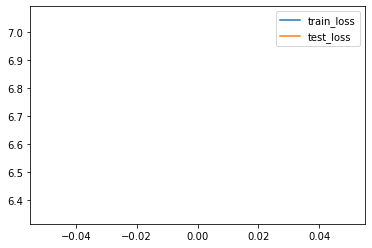

In [18]:
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='test_loss')
plt.legend()
plt.show()

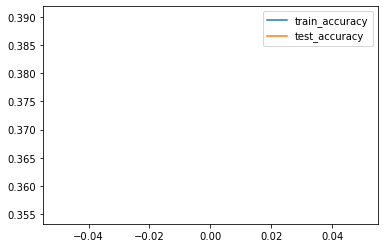

In [19]:
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='test_accuracy')
plt.legend()
plt.show()


### ResNet

In [20]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing import image


resnet = ResNet50(input_shape=image_size+[3],weights='imagenet',include_top=False)


In [21]:
# Dont train the existing weights of Resnet

for layer in resnet.layers:
        layer.trainable=False

In [22]:
# Flatten the Output layer

x=Flatten()(resnet.output)
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=resnet.input,outputs=prediction)

In [23]:

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [27]:
r=model.fit_generator(training_set ,
                      validation_data=test_set,
                      epochs=2,
                      steps_per_epoch=len(training_set),
                      validation_steps=len(test_set)
                      )

C:\Users\Dell\AppData\Local\Temp/ipykernel_6944/241367803.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(training_set ,


Epoch 1/2
718/718 [==============================] - 934s 1s/step - loss: 2.5456 - accuracy: 0.2382 - val_loss: 1.9520 - val_accuracy: 0.2531
Epoch 2/2
718/718 [==============================] - 3354s 5s/step - loss: 2.4424 - accuracy: 0.2597 - val_loss: 2.5389 - val_accuracy: 0.2017


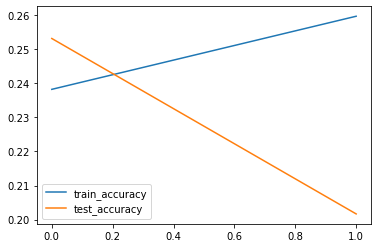

In [28]:
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='test_accuracy')
plt.legend()
plt.show()


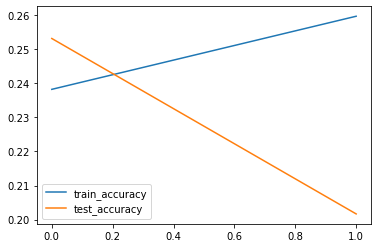

In [29]:
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='test_accuracy')
plt.legend()
plt.show()


### VGG

In [31]:
from tensorflow.keras.applications.vgg19 import VGG19

vgg19 = VGG19(include_top=False,
    weights='imagenet',
    input_shape=image_size + [3])

In [32]:

# Dont train the vgg19 layers.
for layer in vgg19.layers:
    layer.trainable=False

In [33]:
# Flatten the Output layer

x=Flatten()(vgg19.output)
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=vgg19.input,outputs=prediction)

In [34]:

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [35]:
r=model.fit_generator(training_set ,
                      validation_data=test_set,
                      epochs=4,
                      steps_per_epoch=len(training_set),
                      validation_steps=len(test_set)
                      )

C:\Users\Dell\AppData\Local\Temp/ipykernel_6944/4032089806.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(training_set ,


Epoch 1/4
138/718 [====>.........................] - ETA: 25:05 - loss: 2.0532 - accuracy: 0.2550

KeyboardInterrupt: 

In [ ]:
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='test_accuracy')
plt.legend()
plt.show()


In [ ]:
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='test_accuracy')
plt.legend()
plt.show()


### Neural Networks 